In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 18})

In [2]:
#rp = np.ones(1000) #rp over z dimension
z = np.linspace(0,1,1000)
#C = (1-np.tanh(z_points*5-2))/2
#C = np.linspace(1,0.5,10002) #C over z dimension
#C[1001] = 0
C = np.empty(1000)
dC_dz = np.zeros(1000) #dC/dz over z-dimension
d2C_dz2 = np.zeros(1000) #d^2C/dz^2 over z-dimension

k_het=1
D_g=1
Vs=1

#t = np.linspace(0,1000,1000)
#rp = 0.95*np.ones(1000) + 0.1*np.random.randn(1000)
rp = np.ones(1000)
rp_init = rp
drp_dz = np.zeros(1000)

    
C_left_boundary = 1
dC_dz_left_boundary = 0

for i in range(5000):
    def C_diff_eq(C,z):
        dC_dz_zero = C[1] # The C vector contains C and dC/dz
        dC_dz_one = -2 * 1/rp[int(z)] * drp_dz[int(z)] * C[1] - 2/rp[int(z)]*1*C[0]
        return [dC_dz_zero, dC_dz_one]
    sol = odeint(C_diff_eq, [C_left_boundary, dC_dz_left_boundary], z)

    #if any(C<0):
        #break    
    #print(sol[:,0])
    #print(rp)
    C_quasi = sol[:,0]
    condition = C_quasi<0
    if any(condition):
        C_quasi[condition.argmax():] = 0

    rp = rp - 1/1000 * rp * k_het * C_quasi * Vs
    drp_dz[:-1] = (rp[1:] - rp[:-1])/1000
    drp_dz[-1] = drp_dz[-2]
    if any(rp<1/100):# or any(C<0):
        break

print(i) #4.3 dimensionless time noisy porosity
#4.6 dimensionless time for all rp=1 initial

4602


In [3]:
z = np.linspace(0,1,1000)
#rp_init = np.ones(1000)
drp_dz_init = np.zeros(1000)
def C_diff_eq(C,z):
    dC_dz_zero = C[1] # The C vector contains C and dC/dz
    dC_dz_one = -2 * 1/rp_init[int(z)] * drp_dz_init[int(z)] * C[1] - 2/rp_init[int(z)]*1*C[0]
    return [dC_dz_zero, dC_dz_one]
    
C_left_boundary = 1
dC_dz_left_boundary = 0
initial_C = odeint(C_diff_eq, [C_left_boundary, dC_dz_left_boundary], z)

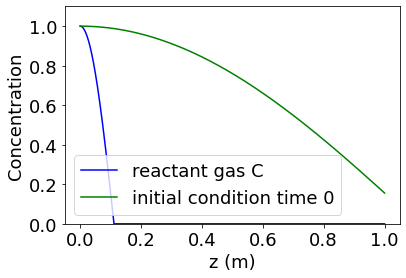

In [4]:
plt.plot(z,sol[:,0],'b-', label='reactant gas C')
plt.plot(z,initial_C[:,0],'g-', label= 'initial condition time 0')
plt.xlabel('z (m)')
plt.ylabel('Concentration')
plt.ylim([0,1.1])
plt.legend()
plt.savefig('reacting_gas_concentration_versus_depth.png', dpi=220,bbox_inches='tight')

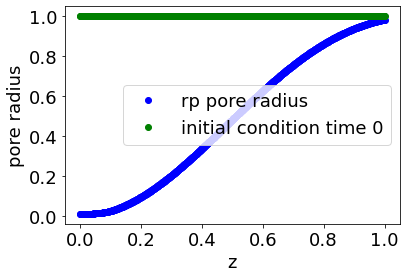

In [5]:
plt.plot(z,rp,'bo', label='rp pore radius')
#rp_init = np.ones(1000)
plt.plot(z,rp_init,'go', label='initial condition time 0')
plt.xlabel('z')
plt.ylabel('pore radius')
plt.legend()
plt.savefig('pore_radius_versus_depth.png', dpi=220,bbox_inches='tight')


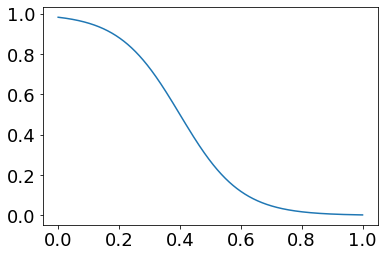

In [6]:
z_points = np.linspace(0,1,10000)
C = (1-np.tanh(z_points*5-2))/2
plt.plot(z_points,C)

In [7]:
test_vec = np.array([False, True, False, False])
if any(test_vec):
    print(test_vec.argmax())

1
